### Тема: Компьютерное моделирование выборок дискретных случайных величин, первичная обработка выборки

**Выполнил**: Лежнин Максим Витальевич (ПМ-31)

**Преподаватель**: Олейник Т.А., кафедра ВМ-1

###### Практическая работа № **2**, вариант № **3**

###### Осенний семестр, 2023 год

###### МИЭТ, Зеленоград

### Библиотеки

In [1]:
import numpy as np
import scipy.stats as sts
import scipy.special as sc
import scipy.integrate as integrate
import matplotlib.pyplot as plt

### Задание 1
Задайте рядом распределения дискретную случайную величину, число возможных значений которой совпадает с длиной вашей фамилии. Сгенерируйте выборки объемов 100 и 1000; для каждой из них составьте статистический ряд, визуализируйте его и сопоставьте с рядом распределения случайной величины.

Напишу общие функции для создания выборки и красивой печати/визуализации.

In [2]:
# possible_values - все возможные значения случайной величины
# probabilities - вероятности выпадения всех возможных значений случайной величины
# sample_size - объем выборки

# функция создания выборки
def generate_sample(possible_values, probabilities, sample_size):
    return np.random.choice(possible_values, sample_size, True, probabilities)

# функция для красивой печати и визуализации статистического ряда и ряда распределения
def print_and_visualise(sample, possible_values, probabilities, sample_size, 
                        precision = 5):
    # высчитаем и выведем на экран статистический ряд
    # справа от него выведем ряд распределения случайной величины
    sample_values = np.sort(list(set(sample)))
    sample_frequencies = [i for i in np.bincount(sample) / sample_size if i != 0]
    print(f"\tSample size: {sample_size}")
    print("Prob mass func\t\tVariational series")
    print("Val\tProb\t\tVal\tFreq")
    for i in range(len(possible_values)):
        print(f"{possible_values[i]}\t{round(probabilities[i], precision)}", end="")
        if i < len(sample_values):
            print(f"\t\t{sample_values[i]}\t{round(sample_frequencies[i], precision)}")
        else:
            print()
    print()

    # визуализируем оба ряда
    plt.figure()
    plt.bar(sample_values, sample_frequencies, width=0.5, color="b", 
            label="Статистический ряд")
    plt.bar(possible_values, probabilities, width=0.3, alpha=0.5, color="r", 
            label="Ряд распределения")
    plt.title(f"Объем выборки: {sample_size}")
    plt.legend()
    plt.grid(True)

Покажу два случая. В первом случае вероятность выпадения любого элемента из листа значений будет одинаковая, во втором же вероятности будут распределены следующим образом: $(0,\, 0.05),\ (1,\, 0.15),\ (2,\, 0.3),\ (3,\, 0.3),\ (4,\, 0.15),\ (5,\, 0.05)$. В каждом случае рассмотрю выборки объемом 100, 1000, 10000, 100000.

Рассмотрим первый случай (равномерное распределение).

	Sample size: 100
Prob mass func		Variational series
Val	Prob		Val	Freq
0	0.16667		0	0.19
1	0.16667		1	0.14
2	0.16667		2	0.17
3	0.16667		3	0.13
4	0.16667		4	0.18
5	0.16667		5	0.19

	Sample size: 1000
Prob mass func		Variational series
Val	Prob		Val	Freq
0	0.16667		0	0.163
1	0.16667		1	0.152
2	0.16667		2	0.167
3	0.16667		3	0.177
4	0.16667		4	0.185
5	0.16667		5	0.156

	Sample size: 10000
Prob mass func		Variational series
Val	Prob		Val	Freq
0	0.16667		0	0.1649
1	0.16667		1	0.1681
2	0.16667		2	0.1647
3	0.16667		3	0.1715
4	0.16667		4	0.1655
5	0.16667		5	0.1653

	Sample size: 100000
Prob mass func		Variational series
Val	Prob		Val	Freq
0	0.16667		0	0.1673
1	0.16667		1	0.16601
2	0.16667		2	0.16692
3	0.16667		3	0.16863
4	0.16667		4	0.16447
5	0.16667		5	0.16667



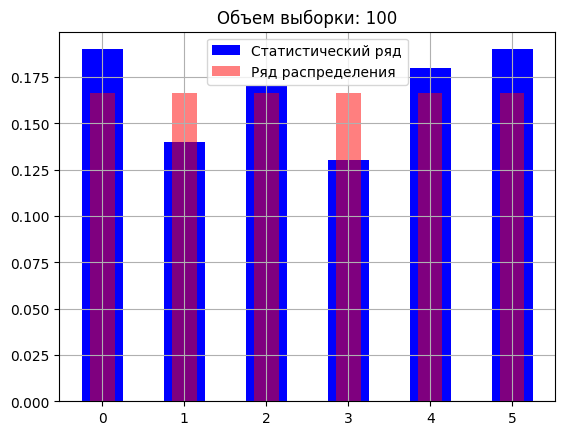

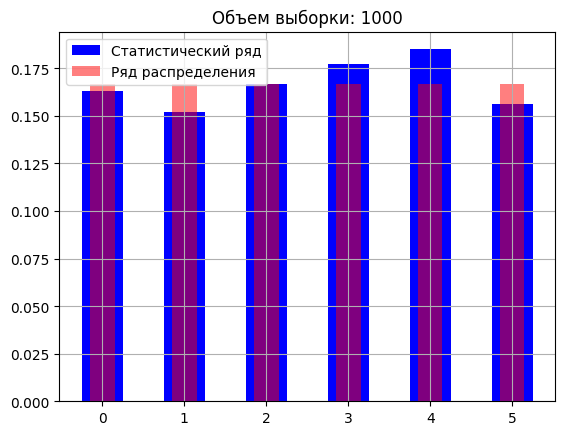

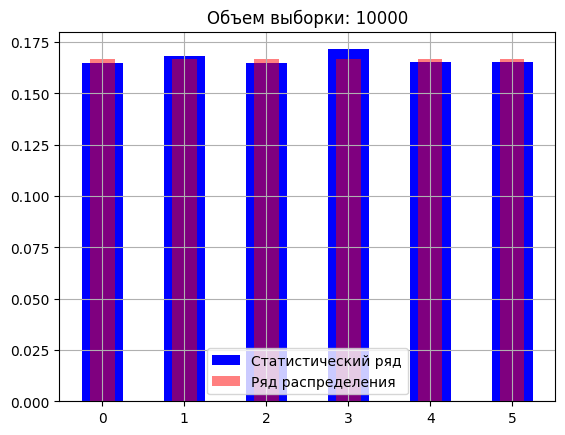

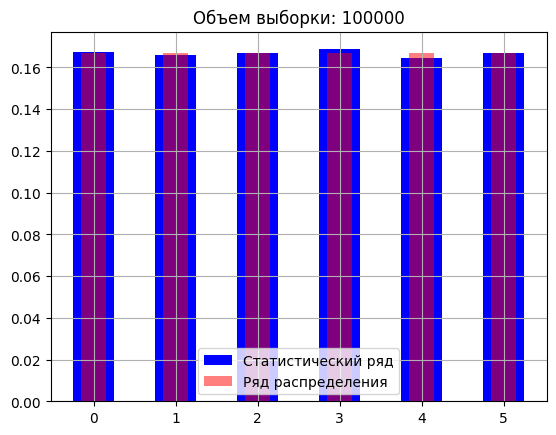

In [3]:
# ряд распределения
possible_values = [i for i in range(len("Лежнин"))]
probabilities = [1 / len(possible_values) for i in range(len(possible_values))]

# размеры выборок
sample_sizes = [100, 1000, 10000, 100000]

# выполняем задание для конкретных объемов выборок
for sample_size in sample_sizes:
    X = generate_sample(possible_values, probabilities, sample_size)
    print_and_visualise(X, possible_values, probabilities, sample_size)

Теперь рассмотрим второй случай, где ряд распределдения: $(0,\, 0.05),\ (1,\, 0.15),\ (2,\, 0.3),\ (3,\, 0.3),\ (4,\, 0.15),\ (5,\, 0.05)$.

	Sample size: 100
Prob mass func		Variational series
Val	Prob		Val	Freq
0	0.05		0	0.05
1	0.15		1	0.18
2	0.3		2	0.24
3	0.3		3	0.29
4	0.15		4	0.16
5	0.05		5	0.08

	Sample size: 1000
Prob mass func		Variational series
Val	Prob		Val	Freq
0	0.05		0	0.049
1	0.15		1	0.14
2	0.3		2	0.316
3	0.3		3	0.283
4	0.15		4	0.162
5	0.05		5	0.05

	Sample size: 10000
Prob mass func		Variational series
Val	Prob		Val	Freq
0	0.05		0	0.0518
1	0.15		1	0.1496
2	0.3		2	0.2954
3	0.3		3	0.3022
4	0.15		4	0.1508
5	0.05		5	0.0502

	Sample size: 100000
Prob mass func		Variational series
Val	Prob		Val	Freq
0	0.05		0	0.05022
1	0.15		1	0.15223
2	0.3		2	0.29831
3	0.3		3	0.30084
4	0.15		4	0.14865
5	0.05		5	0.04975



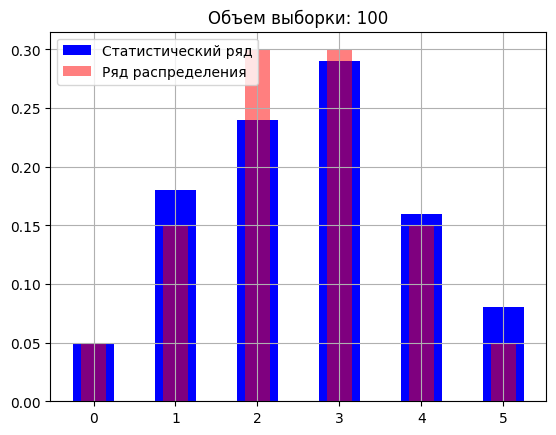

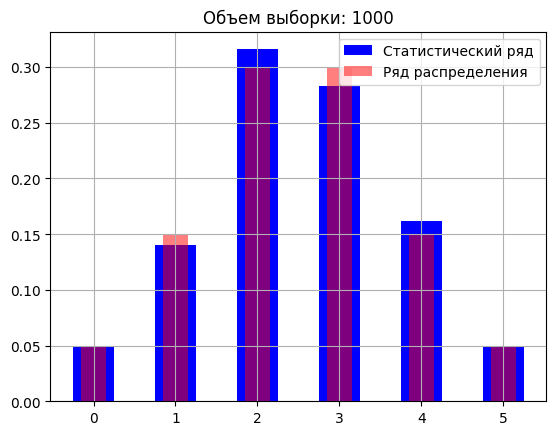

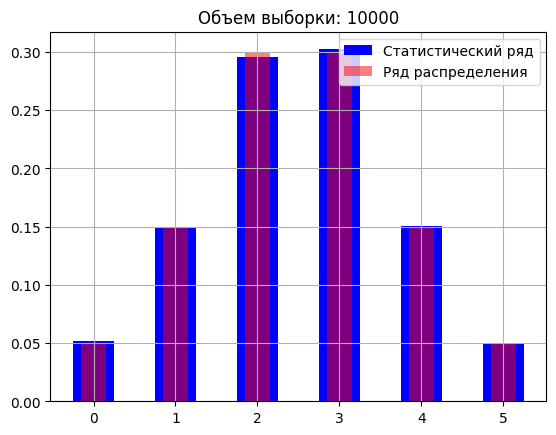

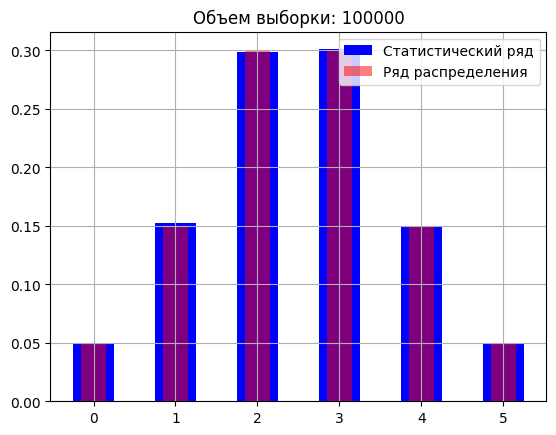

In [4]:
# ряд распределения
possible_values = [i for i in range(len("Лежнин"))]
probabilities = [0.05, 0.15, 0.3, 0.3, 0.15, 0.05]

# размеры выборок
sample_sizes = [100, 1000, 10000, 100000]

# выполняем задание для конкретных объемов выборок
for sample_size in sample_sizes:
    X = generate_sample(possible_values, probabilities, sample_size)
    print_and_visualise(X, possible_values, probabilities, sample_size)

### Задание 2
Проводятся последовательные испытания шести приборов, надежность каждого из которых равна 0.6. Каждый следующий
прибор испытывается только в том случае, когда предыдущий оказался надежным. Случайная величина X – число испытанных в данном эксперименте приборов.
- Составьте теоретический закон распределения случайной величины и сгенерируйте по нему выборку объема 100;
- Путем компьютерного моделирования эксперимента получите выборку объема 100 (при разработке компьютерной модели исходите непосредственно из описания эксперимента, а не из теоретического закона распределения);
- Проиллюстрируйте теорему Чебышёва для одинаково распределенных слагаемых.

Составим теоретический закон распределения. Мы тестируем приборы один за другим до первого отказа, то есть случайная величина распределена по усеченному геометрическому закону (X начинается с 1, поскольку мы хотя бы один прибор протестируем). "Успехом" будем считать отказ прибора. 

$\begin{align*}
&P\{X = 1\} = 0.4 \\
&P\{X = 2\} = 0.6 \cdot 0.4 \\
&P\{X = 3\} = 0.6^2 \cdot 0.4 \\
&P\{X = 4\} = 0.6^3 \cdot 0.4 \\
&P\{X = 5\} = 0.6^4 \cdot 0.4 \\
&P\{X = 6\} = 0.6^5 \cdot 0.4 + 0.6^6 
\end{align*}
$

В случае $X = 6$ мы протестируем все приборы вне зависимости от того, отказал последний или нет.

Сгенерируем выборку объемом 100 согласно полученному закону.

	Sample size: 100
Prob mass func		Variational series
Val	Prob		Val	Freq
1	0.4		1	0.37
2	0.24		2	0.2
3	0.144		3	0.18
4	0.0864		4	0.12
5	0.05184		5	0.06
6	0.07776		6	0.07

	Sample size: 1000
Prob mass func		Variational series
Val	Prob		Val	Freq
1	0.4		1	0.409
2	0.24		2	0.253
3	0.144		3	0.147
4	0.0864		4	0.078
5	0.05184		5	0.04
6	0.07776		6	0.073

	Sample size: 10000
Prob mass func		Variational series
Val	Prob		Val	Freq
1	0.4		1	0.4095
2	0.24		2	0.2382
3	0.144		3	0.1403
4	0.0864		4	0.0812
5	0.05184		5	0.0541
6	0.07776		6	0.0767

	Sample size: 100000
Prob mass func		Variational series
Val	Prob		Val	Freq
1	0.4		1	0.39786
2	0.24		2	0.24099
3	0.144		3	0.14411
4	0.0864		4	0.08626
5	0.05184		5	0.05319
6	0.07776		6	0.07759



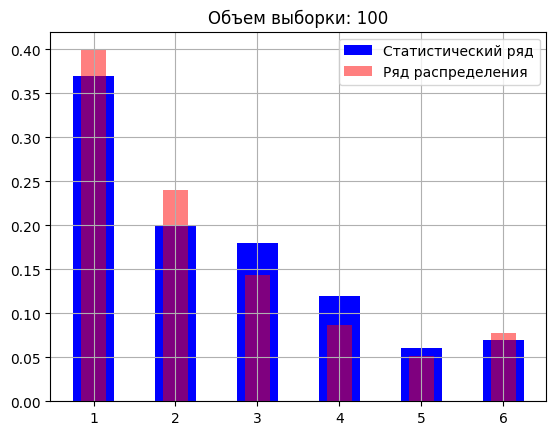

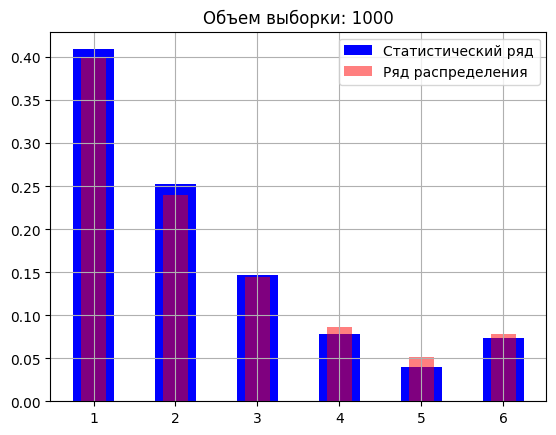

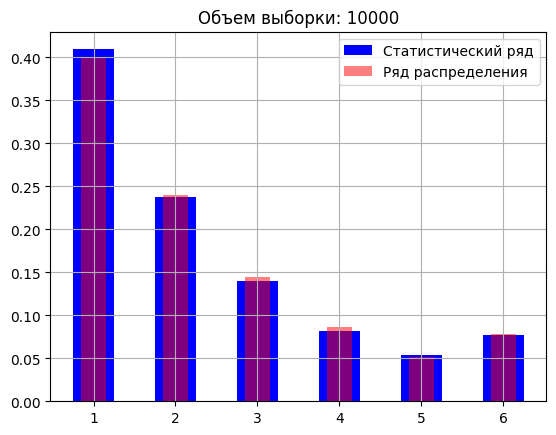

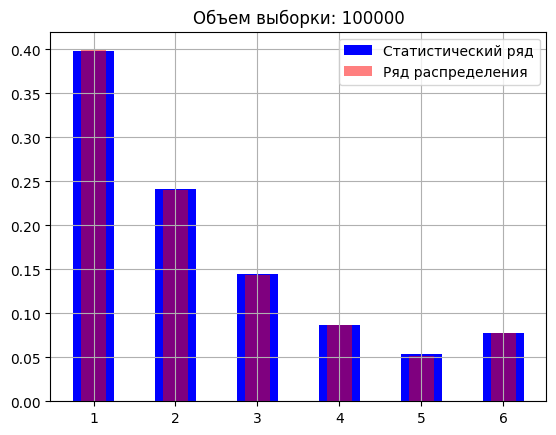

In [5]:
# ряд распределения
possible_values = [i for i in range(1, 7)]
probabilities = [0.4 * 0.6 ** i for i in range(6)]
probabilities[-1] += 0.6 ** 6

# размеры выборок
sample_sizes = [100, 1000, 10000, 100000]

# выполняем задание для конкретных объемов выборок
for sample_size in sample_sizes:
    # воспользуемся функциями с первого упражнения для генерации и визуализации выборки
    X = generate_sample(possible_values, probabilities, sample_size)
    print_and_visualise(X, possible_values, probabilities, sample_size)

Теперь смоделируем испытания шести приборов и на основе модели сгенерируем выборку.

In [6]:
# функция моделирующая работоспособность прибора
def device(probability):
    return np.random.choice([0, 1], p=[1 - probability, probability])

# функция моделирующая испытание number_of_devices последовательных приборов 
# при надежности reliability
def testing_devices(number_of_devices, reliability):
    tested = 1
    while tested < number_of_devices and device(reliability):
        tested += 1
    return tested

	Sample size: 100
Prob mass func		Variational series
Val	Prob		Val	Freq
1	0.4		1	0.43
2	0.24		2	0.22
3	0.144		3	0.19
4	0.0864		4	0.06
5	0.05184		5	0.04
6	0.07776		6	0.06

	Sample size: 1000
Prob mass func		Variational series
Val	Prob		Val	Freq
1	0.4		1	0.402
2	0.24		2	0.233
3	0.144		3	0.147
4	0.0864		4	0.075
5	0.05184		5	0.058
6	0.07776		6	0.085

	Sample size: 10000
Prob mass func		Variational series
Val	Prob		Val	Freq
1	0.4		1	0.4029
2	0.24		2	0.2414
3	0.144		3	0.1386
4	0.0864		4	0.0852
5	0.05184		5	0.0506
6	0.07776		6	0.0813

	Sample size: 100000
Prob mass func		Variational series
Val	Prob		Val	Freq
1	0.4		1	0.39843
2	0.24		2	0.24054
3	0.144		3	0.14557
4	0.0864		4	0.0873
5	0.05184		5	0.05096
6	0.07776		6	0.0772



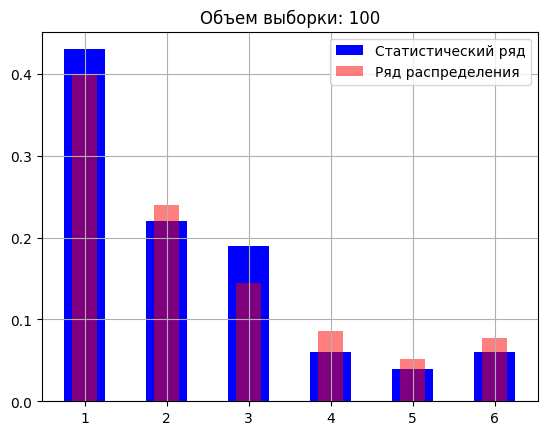

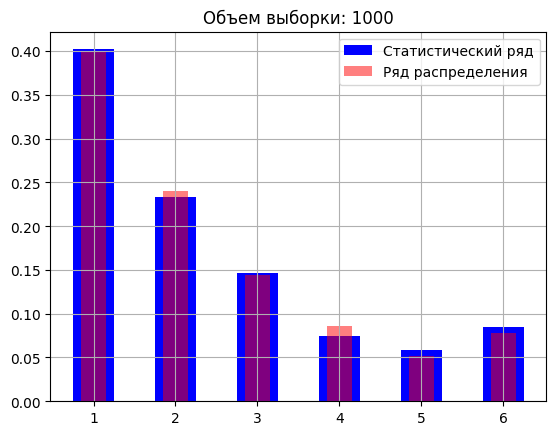

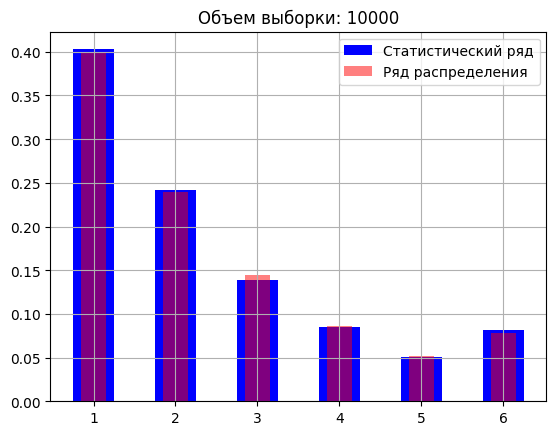

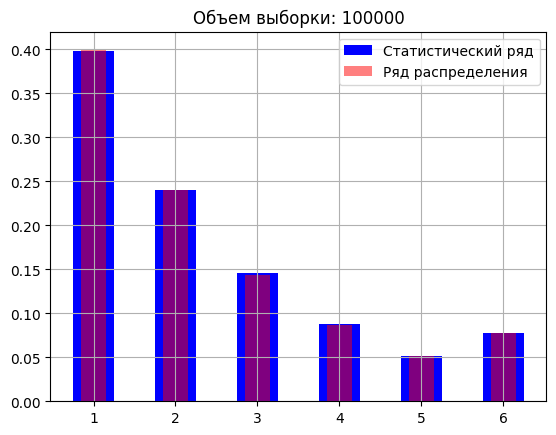

In [7]:
# данные для модели
number_of_devices = 6
reliability = 0.6

# размеры выборок
sample_sizes = [100, 1000, 10000, 100000]

# выполняем задание для конкретных объемов выборок
for sample_size in sample_sizes:
    # генерируем выборку с помощью модели
    X = [testing_devices(number_of_devices, reliability) for i in range(sample_size)]

    # визуализируем результат
    print_and_visualise(X, possible_values, probabilities, sample_size)

#### Теорема Чебышева (для одинаково распределенных величин):

Пусть существует n независимых одинаково распределенных случайных величин $X_1,\ X_2,\ ...,\ X_n$, которые обладают одинаковым математическим ожиданием $M[X]$. Тогда:

$$\forall \varepsilon > 0 \left| \frac{X_1 + X_2 + ... X_n}{n} - M[X] \right| < \varepsilon$$

или, что то же самое:

$$\forall \varepsilon > 0\ \lim\limits_{n \to \infty} P\left\{\left| \frac{X_1 + X_2 + ... X_n}{n} - M[X] \right| < \varepsilon\right\} = 1$$

То есть чем больше выборка, тем меньше разница выборочного среднего и самого математического ожидания. Продемонстрируем на примере из этого упражнения, но возьмем уже 10 приборов:

In [8]:
# выборочное среднее
def sample_mean(sample):
    return sum(sample) / len(sample)

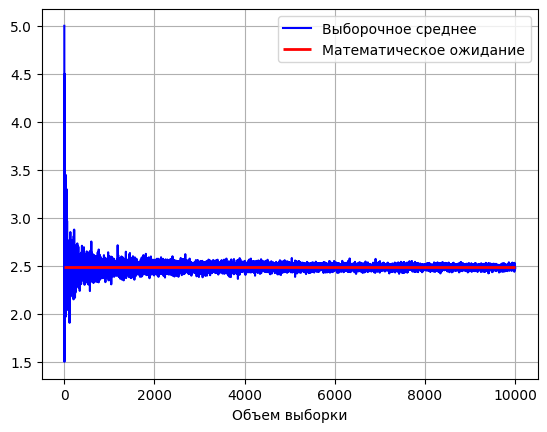

In [9]:
# данные для модели
number_of_devices = 10
reliability = 0.6

# наибольший размер выборки
max_sample_size = 10000

# ряд распределения
possible_values = [i for i in range(1, number_of_devices + 1)]
probabilities = [(1 - reliability) * reliability ** i for i in range(number_of_devices)]
probabilities[-1] += reliability ** number_of_devices

# визуализируем график выборочного среднего от объема выборки
sample_size = [i for i in range(1, max_sample_size)]
mean = [sample_mean(generate_sample(possible_values, probabilities, i)) 
        for i in sample_size]
plt.plot(sample_size, mean, color="b", label="Выборочное среднее")

# посчитаем математическое ожидание случайной величины и построим его на графике
expected_value = sum([possible_values[i] * probabilities[i] 
                      for i in range(len(possible_values))])
plt.hlines(expected_value, 0, max_sample_size, colors='r', lw=2, 
           label="Математическое ожидание")

# пара штук для графика
plt.legend()
plt.xlabel("Объем выборки")
plt.grid(True)

### Задание 3
Путем компьютерного моделирования эксперимента проверьте гипотезу о том, что при одновременном подбрасывании двух игральных костей две конкретные одинаковые цифры выпадают «в два раза реже», чем две конкретные различные.

	Sample size: 8229
Prob mass func		Variational series
Val	Prob		Val	Freq
1	0.33333		1	0.33564
2	0.66667		2	0.66436



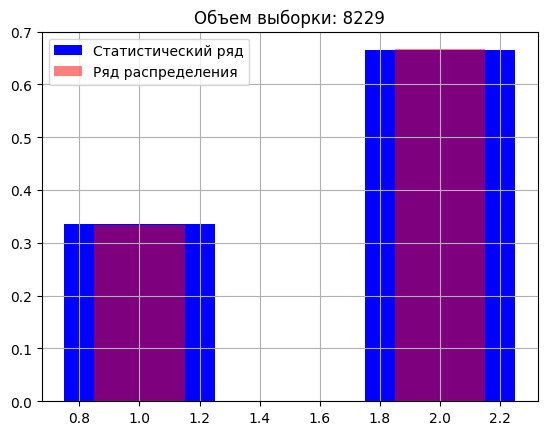

In [10]:
# ряд распределения для одного кубика
possible_values = [i for i in range(1, 7)]
probabilities = [1/6 for i in range(1, 7)]

# размер выборки
sample_size = 100000

# пары конкретных чисел 
# без ограничения общности в качестве пары одинаковых цифр можно выбрать (1, 1), 
# а в качестве пары различных (1, 2)
same_pair = (1, 1)
diff_pair = (1, 2)

# моделирую две независмые случайные выборки значений кубиков
cube_1 = generate_sample(possible_values, probabilities, sample_size)
cube_2 = generate_sample(possible_values, probabilities, sample_size)

# на основе двух выборок создаю новую, в которой СВ принимает 3 значения
# 0 - если значения костей не являются искомыми парами
# 1 - если на двух костях выпала искомая пара одинаковых цифр (same_pair)
# 2 - если на двух костях выпала искомая пара различных цифр (diff_pair)
X = []
for i in range(sample_size):
    if (cube_1[i], cube_2[i]) == same_pair:
        X.append(1)
    elif ((cube_1[i], cube_2[i]) == diff_pair) or ((cube_2[i], cube_1[i]) == diff_pair):
        X.append(2)
    else:
        X.append(0)

# нас не особо интересует ситуация, когда случайная величина принимает 0, 
# поэтому сократим выборку убрав оттуда нули
X = [i for i in X if i != 0]

# гипотетический ряд распределения
possible_values = [1, 2]
probabilities = [1/3, 2/3]

# визуализируем и проверим гипотезу
print_and_visualise(X, possible_values, probabilities, len(X))

### Задание 4
Проводится эксперимент, состоящий в подбрасывании восьми игральных костей и наблюдении цифр, выпавших на верхних гранях.
- Проведите компьютерное моделирование эксперимента, непосредственно исходя из его описания.
- Проиллюстрируйте теорему Бернулли, построив график зависимости относительной частоты наблюдения события A = «выпадут хотя бы три четные цифры» от длины серии экспериментов.

Сначала посчитаем теоретически - какая вероятность такого события А. Вероятность получить четную цифру на кубике равна 0.5, а нам нужно получить ее хотя бы на 3 кубиках из 8 (вне зависимости от их порядка). То есть:
$$P(A) = 1 - P(\bar{A}) = 1 - \frac{C_8^0 \cdot 3^8 + C_8^1 \cdot 3^8 + C_8^2 \cdot 3^8}{6^8} = \frac{219}{256} = 0.85546875$$

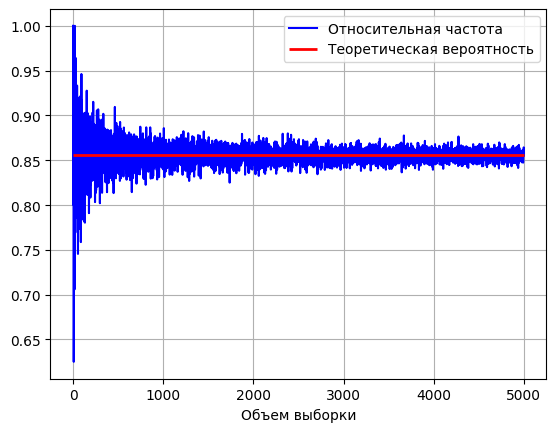

In [11]:
# ряд распределения для одного кубика
possible_values = [i for i in range(1, 7)]
probabilities = [1/6 for i in range(1, 7)]

# количество кубиков
num_of_cubes = 8

# размеры выборки
max_sample_size = 5000
sample_sizes = [i for i in range(1, max_sample_size)]

# лист относительных частот наблюдей события А
frequencies = []

# посчитаем относительные частоты при разных объемах выборки
for sample_size in sample_sizes:
    # генерирую лист случайных выборок кубиков
    cubes = [generate_sample(possible_values, probabilities, sample_size) 
             for i in range(num_of_cubes)]

    # рассматриваю событие A = "выпадут хотя бы 3 четные цифры"
    A = [int(sum([(cube[i] + 1) % 2 for cube in cubes]) > 2) 
         for i in range(sample_size)]

    # посчитаем относительную частоту наблюдения события А
    frequencies.append(sum(A) / sample_size)

# график зависимости относительной частоты наблюдения события А от объема выборки
plt.plot(sample_sizes, frequencies, color="b", label="Относительная частота")

# построим теоретическую вероятность этого события на этом же графике
plt.hlines(0.85546875, 0, max_sample_size, colors="r", lw=2, 
           label="Теоретическая вероятность")

# пара штук для графика
plt.legend()
plt.xlabel("Объем выборки")
plt.grid(True)

Отчетливо видим, что с увеличением длины серии экспериментов случайность превращается в закономерность.